# Ячейка с импортом библиотек

In [1]:
# Подключение модулей
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

# Моделирование случайной величины

#### Параметры моделирования и распределения
$ \text{Среднеквадратическое отклонение (СКО), } \sigma - \text{SIGMA\_PARAM}; \\$
$ \text{Математическое ожидание, } m - \text{MU\_PARAM}; \\$
$ \text{Число опытов со случайным исходом} - \text{N\_VALUES}; \\ $
$ \text{Число независимых датчиков случайных чисел (ДСЧ)} - \text{N\_INDEPENDENT}. $

In [2]:
SIGMA_PARAM = 3
MU_PARAM = 2         
N_VALUES = 10000
N_INDEPENDENT = 12

#### Формирование нормально распределенной СВ двумя способами

Встроенная функция из модуля numpy:

In [3]:
Z_LIB = np.random.normal( # собственно функция, которая формирует СВ, распределенную по нормальному закону 
                loc=MU_PARAM, # математическое ожидание ГСВ
                scale=SIGMA_PARAM, # СКО ГСВ
                size=N_VALUES) # число опытов

Формирование нормально распределенной СВ z из равномерно распределенной СВ x на интервале [0,1) с помощью центральной предельной теоремы:

$$z = \dfrac{(y - m_y) \sigma}{\sqrt{D_y}} + m,  \\ $$
$\text{ где} $
$ y = \displaystyle\sum_{i=1}^n x_i - \text{формула центральной предельной теоремы,}\\ \\ $
$ D_y = n/12 - \text{дисперсия СВ y,} \\ $
$ m_y = n/2 - \text{математическое ожидание СВ y,} \\ $
$ \sigma = \text{SIGMA\_PARAM} - \text{СКО ГСВ,} \\ $
$ m = \text{MU\_PARAM} - \text{математическое ожидание ГСВ,} \\$
$ n = \text{N\_INDEPENDENT} - \text{число независимых ДСЧ,} \\$
$ z = \text{Z\_CUSTOM} - \text{обозначение в коде.}\\$

In [4]:
X_I = np.random.uniform(
                low=0.0, # нижняя граница
                high=1.0, # верхняя граница
                size=(N_VALUES, N_INDEPENDENT)) # Размер. Вдоль одной оси - число реализаций, вдоль второй - разные ДСЧ
Y_S = np.sum(X_I, # Суммируем реализации СВ от разных ДСЧ 
             axis=1) # вдоль оси 1 располагаются значения одного и того же номера опыта разных ДСЧ
Z_CUSTOM = (Y_S - N_INDEPENDENT/2)*SIGMA_PARAM/np.sqrt(N_INDEPENDENT/12) + MU_PARAM # Формула центральной предельной теоремы

### Графики ПРВ (аналитический и экспериментальный) равномерно распределенной СВ

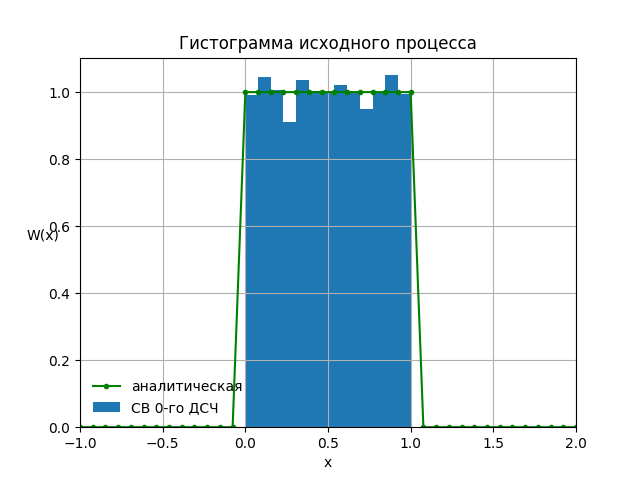

In [5]:
n_edges = 40 # Число граней, определяющее число "бинов", между которыми распределяются реализации
x_axis = np.linspace(-1, 2, n_edges) # Массив значений для оси абсцисс
wx_analityc = (x_axis>=0) & (x_axis<=1) # Способ задать аналитическое представление ПРС равномерной СВ

plt.figure()
plt.plot(x_axis, # значения по оси абсцисс
         wx_analityc, # значения по оси ординат
         'g.-', # формат линии (зеленая сплошная с точками)
         label='аналитическая') # название линии
plt.hist(X_I[:,0], # значения по оси ординат. Индекс [:,0] означает, что выводится распределение значений 0го ДСЧ. Можно менять
         density=True, # значение для каждого "бина" определяется по формуле density = counts / (sum(counts) * np.diff(bins))
         bins=x_axis, # число "бинов" гистограммы. По сути - её дискретность
         label='СВ 0-го ДСЧ')

# Форматирование графика
plt.legend(loc='best', # наилучшее положение легенды
           frameon=False) # Отключаем рамку гистограммы
plt.title('Гистограмма исходного процесса')
plt.xlabel('x') # Подпись оси абсцисс
plt.xlim((-1,2)) # здесь можно задать пределы отображения
plt.ylabel('W(x)', # подпись оси ординат
           rotation='horizontal') # ориентация подписи оси ординат
plt.grid() # Включить отображение "сетки"
plt.show() # Отобразить график

### Графики ПРВ (аналитический и экспериментальный) Гауссовской СВ

In [6]:
n_edges = 40 # число "дискрет" гистограммы
x_axis = np.linspace( # формирование дискрет, необходимых для отрисовки аналитической зависимости ПРВ
                -3*SIGMA_PARAM + MU_PARAM, # начальное значение (включено)
                +3*SIGMA_PARAM + MU_PARAM, # конечное значение (не включено)
                n_edges) # общее число значений
wz_analityc = norm.pdf( # Функция, создающая набор значений, описывающих форму ПРВ гауссовской СВ
                x_axis, # Набор значений по оси абсцисс
                loc=MU_PARAM, # математическое ожидание
                scale=SIGMA_PARAM) # СКО 

# Графики

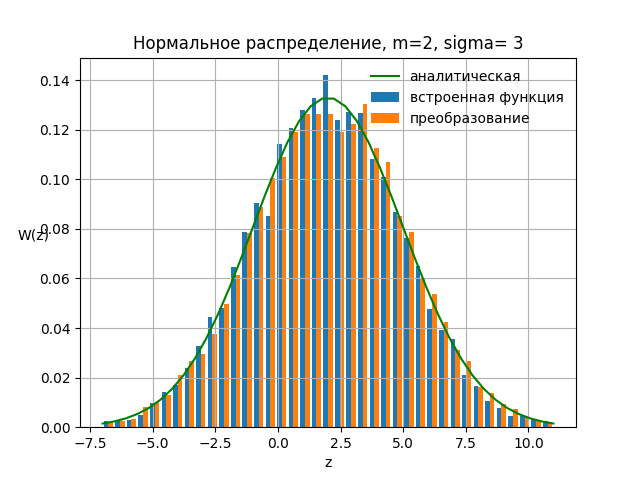

In [7]:
plt.figure()
plt.plot(x_axis, # значения по оси абсцисс
         wz_analityc, # значения по оси ординат
         'g-', # формат линии (зеленая сплошная)
         label='аналитическая') # название линии
plt.hist([Z_LIB, Z_CUSTOM], # значения по оси ординат. Питон позволяет на одних и тех же "бинах" строить несколько разных графиков
         density=True, # включение "масштабирования" графика
         bins=x_axis, # бины гистограммы
         label=['встроенная функция', 'преобразование']) # названия линий

# Форматирование графика
plt.legend(loc='best', # выбор наилучшего по мнению питона местоположения легенды графика
           frameon=False) # отключение рамки вокруг легенды
plt.title('Нормальное распределение, m=' + str(MU_PARAM) + ', sigma= ' + str(SIGMA_PARAM)) # название графика
plt.xlabel('z') # Название оси абсцисс
plt.ylabel('W(z)', # название оси ординат
           rotation='horizontal') # ориентация названия оси ординат
plt.grid() # включить сетку
plt.show() # отобразить график

# ЗАДАНИЕ

Смоделируйте в последующих ячейках распределение, заданное Вам по варианту, опираясь на приведенный выше код